In [40]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [41]:
def drawImg(image,title="Image"):
    plt.imshow(image)
    plt.axis('off',cmap="gray")
    plt.title(title+str(image.shape))
    plt.style.use('seaborn')
    plt.show()

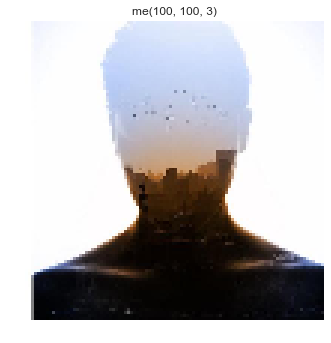

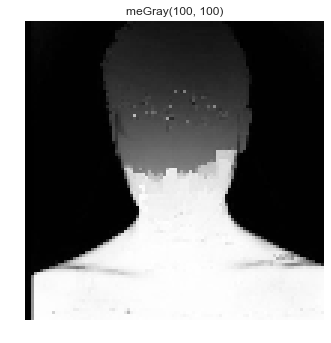

In [42]:
img = cv2.imread('me.jpeg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(100,100))
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
drawImg(img,"me")
drawImg(img_gray,"meGray")

In [48]:
#Hardcoded Filter
def convulution(img,img_filter):
    w = img.shape[0]
    h = img.shape[1]
    
    f = img_filter.shape[0]
    new_img = np.zeros((w-f+1,h-f+1))
    
    for row in range(new_img.shape[0]):
        for col in range(new_img.shape[1]):
            for i in range(f):
                for j in range(f):
                    new_img[row][col] += img[row+i][col+j]*img_filter[i][j]
                
            if(new_img[row][col]>255):
                new_img[row][col] = 255
            elif(new_img[row][col]<0):
                new_img[row][col] = 0
                    
    return new_img
                    

In [49]:
blur_filter = np.ones((3,3))/9.0
output = convulution(img_gray,blur_filter)

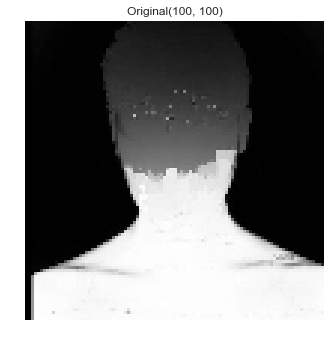

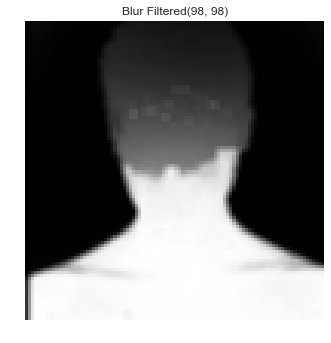

In [54]:
drawImg(img_gray,"Original")
drawImg(output,"Blur Filtered")

In [51]:
edge_filter = np.array(([1,0,-1],
                       [1,0,-1],
                       [1,0,-1]))
output1 = convulution(img_gray,edge_filter)

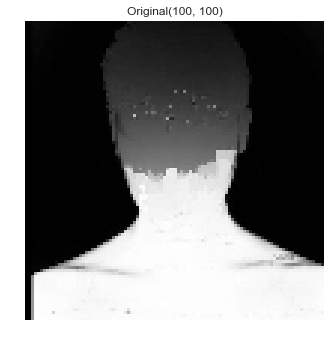

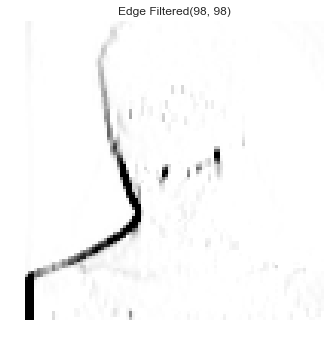

In [53]:
drawImg(img_gray,"Original")
drawImg(output1,"Edge Filtered")

#### Padding:
- Increasing the size of an image so that applying a CNN layer results in an output layer of the same size as the original image 
- H0 = (H+(2*PH))-F+1
- W0 = (W+(2*PW))-F+1

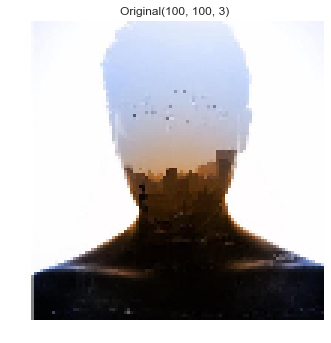

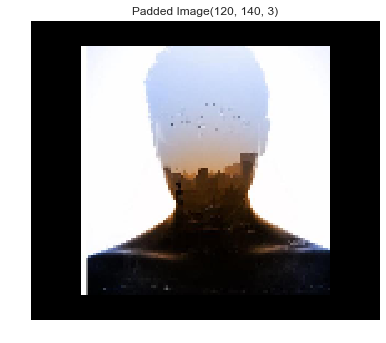

In [64]:
drawImg(img,"Original")

pad_img = np.pad(img,((10,10),(20,20),(0,0)),'constant',constant_values=0)
drawImg(pad_img,"Padded Image")

#### Stride:
- Stride defines how a filter should move across the input image, it is not necessary that a filter has to move by a factor of one pixel only.
- H0 = (H-F)/S + 1
- W0 = (W-F)/S + 1

#### Pooling Layer:
- Pooling is done after convulation operation
- Two Types:
    - Average Pooling 
        - When sliding the window across the volume, sum the values of all elements in the window and take their mean 
    - Max Pooling
        - When sliding the window across the volume, extract the highst value from the elements. 

In [67]:
def pooling(x,mode='max'):
    s = 2
    f = 2
    H,W = x.shape
    H0 = int((H-f)/s + 1)
    W0 = int((W-f)/s + 1)
    output = np.zeros((H0,W0))
    for r in range(H0):
        for c in range(W0):
            r_start = r*s
            r_end = r_start + f
            c_start = c*s
            c_end = c_start + f
            
            x_slice = x[r_start:r_end,c_start:c_end]
            if mode=='max':
                output[r][c] = np.max(x_slice)
            else:
                output[r][c] = np.mean(x_slice)
    return output

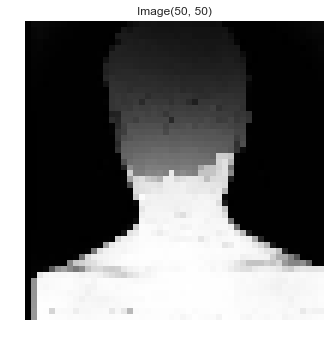

In [70]:
pool_out = pooling(img_gray)
drawImg(pool_out)